In [21]:
import xarray as xr
import numpy as np
import pandas as pd

In [49]:
OCF=xr.open_mfdataset('/export/home1/DATA/PIRATE/SDL_DATASETS/V2/200?/*.nc')
OCF['DATASETS']=OCF.DATASETS[0,:]
OCF['STANDARD_LEVELS']=OCF.STANDARD_LEVELS[0,:]
OCF

<xarray.Dataset>
Dimensions:             (N_DATASET: 5, N_LEVELS: 299, N_MEMBER: 50, N_OBS: 2521)
Dimensions without coordinates: N_DATASET, N_LEVELS, N_MEMBER, N_OBS
Data variables:
    STANDARD_LEVELS     (N_LEVELS) float64 dask.array<shape=(299,), chunksize=(299,)>
    POTM_Hx             (N_MEMBER, N_OBS, N_LEVELS) float64 dask.array<shape=(50, 2521, 299), chunksize=(50, 86, 299)>
    JULD                (N_OBS) float64 dask.array<shape=(2521,), chunksize=(86,)>
    LONGITUDE           (N_OBS) float64 dask.array<shape=(2521,), chunksize=(86,)>
    TEMP_OBS            (N_OBS, N_LEVELS) float64 dask.array<shape=(2521, 299), chunksize=(86, 299)>
    PSAL_OTH            (N_DATASET, N_OBS, N_LEVELS) float64 dask.array<shape=(5, 2521, 299), chunksize=(5, 86, 299)>
    STATION_IDENTIFIER  (N_OBS) |S8 dask.array<shape=(2521,), chunksize=(86,)>
    CYCLE_NUMBER        (N_OBS) float64 dask.array<shape=(2521,), chunksize=(86,)>
    DATASETS            (N_DATASET) |S10 dask.array<shape=(5,), c

In [108]:
(OCF.POTM_Hx[:,:,:].min('N_MEMBER')-OCF.POTM_OBS).mean('N_OBS')

<xarray.DataArray (N_LEVELS: 299)>
dask.array<shape=(299,), dtype=float64, chunksize=(299,)>
Dimensions without coordinates: N_LEVELS

<IPython.core.display.Javascript object>


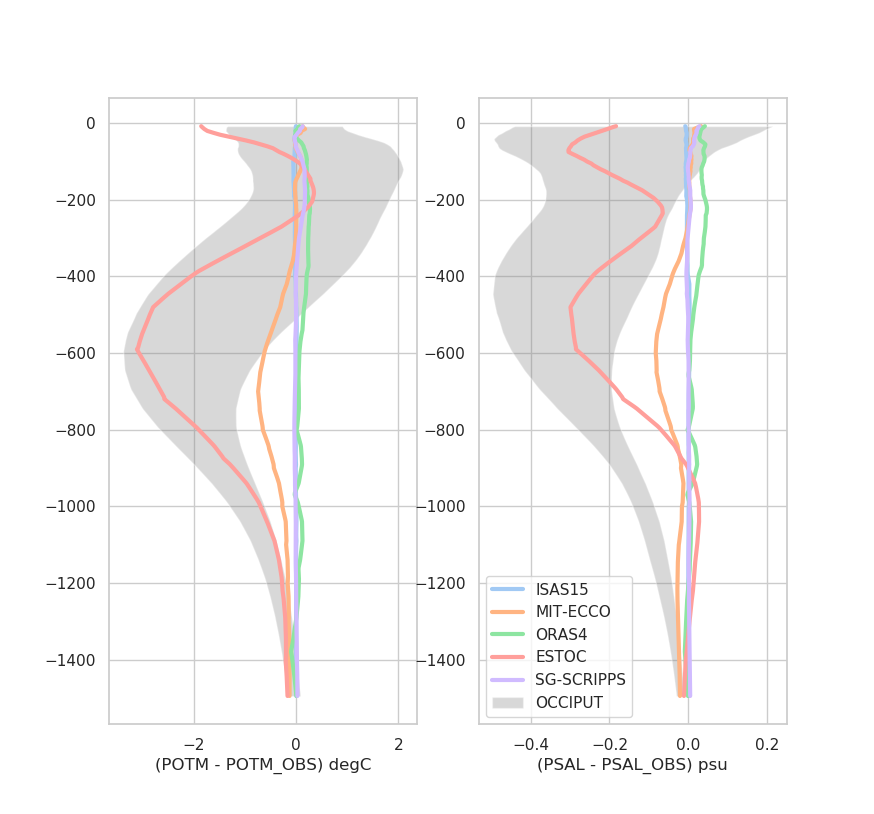

In [110]:
import datetime
%matplotlib notebook

plt.subplot(1,2,1)
for i in range(5):            
    plt.plot((OCF.POTM_OTH[i,:,:]-OCF.POTM_OBS).mean('N_OBS'),OCF.STANDARD_LEVELS,label=OCF.DATASETS[i].values,linewidth=3)
plt.fill_betweenx(OCF.STANDARD_LEVELS,
                  (OCF.POTM_Hx[:,:,:].min('N_MEMBER')-OCF.POTM_OBS).mean('N_OBS'),
                  (OCF.POTM_Hx[:,:,:].max('N_MEMBER')-OCF.POTM_OBS).mean('N_OBS'),
                  facecolor='gray', alpha=0.3, label='OCCIPUT')    
plt.xlabel('(POTM - POTM_OBS) degC')    

plt.subplot(1,2,2)
for i in range(5):            
    plt.plot((OCF.PSAL_OTH[i,:,:]-OCF.PSAL_OBS).mean('N_OBS'),OCF.STANDARD_LEVELS,label=OCF.DATASETS[i].values,linewidth=3)
plt.fill_betweenx(OCF.STANDARD_LEVELS,
                  (OCF.PSAL_Hx[:,:,:].min('N_MEMBER')-OCF.PSAL_OBS).mean('N_OBS'),
                  (OCF.PSAL_Hx[:,:,:].max('N_MEMBER')-OCF.PSAL_OBS).mean('N_OBS'),
                  facecolor='gray', alpha=0.3, label='OCCIPUT')    
plt.xlabel('(PSAL - PSAL_OBS) psu')    
plt.legend(loc='lower left')
